In [46]:
import matplotlib.pyplot as plt
import pandas as pd

In [24]:
df = pd.read_csv("./owid-energy-data.csv", index_col=["iso_code", "year"])
df 

country  coal_prod_change_pct  coal_prod_change_twh  \
iso_code year                                                            
AFG      1900  Afghanistan                   NaN                   NaN   
         1901  Afghanistan                   NaN                 0.000   
         1902  Afghanistan                   NaN                 0.000   
         1903  Afghanistan                   NaN                 0.000   
         1904  Afghanistan                   NaN                 0.000   
...                    ...                   ...                   ...   
ZWE      2015     Zimbabwe               -25.013               -10.847   
         2016     Zimbabwe               -37.694               -12.257   
         2017     Zimbabwe                 8.375                 1.697   
         2018     Zimbabwe                22.555                 4.952   
         2019     Zimbabwe               -35.015                -9.422   

               gas_prod_change_pct  gas_prod_change_twh  oil_prod_change_pct  \
iso_code year                                                                  
AFG      1900                  NaN                  NaN                  NaN   
         1901                  NaN                  NaN                  NaN   
         1902                  NaN                  NaN                  NaN   
         1903                  NaN                  NaN                  NaN   
         1904                  NaN                  NaN                  NaN   
...                            ...                  ...                  ...   
ZWE      2015                  NaN                  NaN                  NaN   
         2016                  NaN                  NaN                  NaN   
         2017                  NaN                  NaN                  NaN   
         2018                  NaN                  NaN                  NaN   
         2019                  NaN                  NaN                  NaN   

               oil_prod_change_twh  energy_cons_change_pct  \
iso_code year                                                
AFG      1900                  NaN                     NaN   
         1901                  NaN                     NaN   
         1902                  NaN                     NaN   
         1903                  NaN                     NaN   
         1904                  NaN                     NaN   
...                            ...                     ...   
ZWE      2015                  NaN                  -0.789   
         2016                  NaN                 -14.633   
         2017                  NaN                     NaN   
         2018                  NaN                     NaN   
         2019                  NaN                     NaN   

               energy_cons_change_twh  biofuel_share_elec  ...  \
iso_code year                                              ...   
AFG      1900                     NaN                 NaN  ...   
         1901                     NaN                 NaN  ...   
         1902                     NaN                 NaN  ...   
         1903                     NaN                 NaN  ...   
         1904                     NaN                 NaN  ...   
...                               ...                 ...  ...   
ZWE      2015                  -0.443               1.363  ...   
         2016                  -8.142               2.154  ...   
         2017                     NaN               2.066  ...   
         2018                     NaN               2.048  ...   
         2019                     NaN               2.285  ...   

               solar_elec_per_capita  solar_energy_per_capita           gdp  \
iso_code year                                                                 
AFG      1900                    NaN                      NaN           NaN   
         1901                    NaN                      NaN           NaN   
         1902                    

Text(0, 0.5, 'global nuclear energy consumed [TWh]')

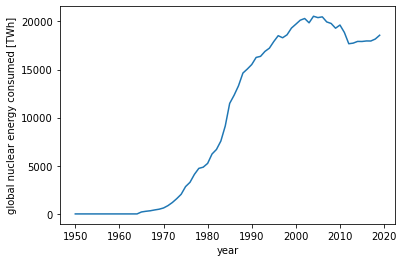

In [58]:
country_information = df[["country", "population", "gdp", "primary_energy_consumption", "energy_per_capita", "energy_per_gdp", "per_capita_electricity"]]
nuclear_information = df[[x for x in df.columns if "nuclear" in x]]

nuclear_information["nuclear_consumption"].groupby(level="year").sum().loc["1950":"2019"].plot()
plt.ylabel("global nuclear energy consumed [TWh]")

<AxesSubplot:ylabel='nuclear_consumption'>

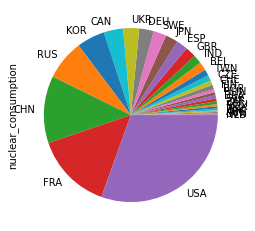

In [54]:
nuclear_consumption_2019_percountry = nuclear_information["nuclear_consumption"].fillna(0).groupby(level="iso_code").apply(lambda x: x.iloc[-2]).sort_values()
nuclear_consumption_2019_percountry.iloc[:-1].plot(kind="pie")